In [1]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/mean_representational_distance/distance_matrix/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/'


In [3]:
mouse_vector = [56165, 32363, 32364, 32365, 411857, 411857, 401714]
conditions_vector = ['RANDOM', 'OVERLAPPING','STABLE']
sessions_random = [4,1,0,2,2,6,2] # total = 6
sessions_overlapping = [1,2,1,0,3,5,0] # total = 6
fixed_corner = [3,4,2,0,1,4,0]
sessions_stable = [2,0,2,0,1,4,1] # total = 5 (4 and 1/2)

In [19]:
random = []
overlapping = []
stable = []

fixed_corner_data = []
occupied_corners_random = []
occupied_corners_stable = []
occupied_corners_overlapping = []
empty_corners_random = []
empty_corners_stable = []
empty_corners_overlapping = []

occupied_corners_overlapping_id = []

for i in range(len(mouse_vector)):
    mouse = mouse_vector[i]
    #### check session_random
    session = sessions_random[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)
            random.append(distance)
            objects_position_file = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/occupied_corners/' + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_random.append(np.load(objects_position_file))
            empty_corners_random.append(np.load(objects_position_file))

    session = sessions_overlapping[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)
            fixed_corner_data.append(fixed_corner[i])
            overlapping.append(distance)
            objects_position_file = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/occupied_corners/' + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_overlapping.append(np.load(objects_position_file))
            empty_corners_overlapping.append(np.load(objects_position_file))
            occupied_corners_overlapping_id.append(np.load(objects_position_file))
            
    session = sessions_stable[i]
    if session:
        file_name = input_directory + 'distance_matrix_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '.npy'
        if os.path.isfile(file_name):
            distance = np.load(file_name)
            stable.append(distance)
            objects_position_file = os.environ['PROJECT_DIR'] + 'calcium_imaging_behaviour/data/occupied_corners/' + 'mouse_'+f'{mouse}'+'_session_'+f'{session}'+'.npy'
            occupied_corners_stable.append(np.load(objects_position_file))
            empty_corners_stable.append(np.load(objects_position_file))

all_corners = [1,2,3,4]


for i in range(len(occupied_corners_random)):
    for trial in range(20):
        non_intersection = list(set(all_corners) ^ set(occupied_corners_random[i][:,trial]))
        empty_corners_random[i][0,trial] = non_intersection[0] + trial * 4 -1
        empty_corners_random[i][1,trial] = non_intersection[1] + trial * 4 -1
        occupied_corners_random[i][0,trial] = (occupied_corners_random[i][0,trial] + trial * 4 -1).astype(int)
        occupied_corners_random[i][1,trial] = (occupied_corners_random[i][1,trial] + trial * 4 -1).astype(int)

        
for i in range(len(occupied_corners_stable)):
    for trial in range(20):
        non_intersection = list(set(all_corners) ^ set(occupied_corners_stable[i][:,trial]))
        empty_corners_stable[i][0,trial] = non_intersection[0] + trial * 4 -1
        empty_corners_stable[i][1,trial] = non_intersection[1] + trial * 4 -1
        occupied_corners_stable[i][0,trial] = (occupied_corners_stable[i][0,trial] + trial * 4 -1).astype(int)
        occupied_corners_stable[i][1,trial] = (occupied_corners_stable[i][1,trial] + trial * 4 -1).astype(int)

for i in range(len(occupied_corners_overlapping)):
    for trial in range(20):
        non_intersection = list(set(all_corners) ^ set(occupied_corners_overlapping[i][:,trial]))
        empty_corners_overlapping[i][0,trial] = non_intersection[0] + trial * 4 -1
        empty_corners_overlapping[i][1,trial] = non_intersection[1] + trial * 4 -1
        
        occupied_corners_overlapping_id[i][0,trial] = fixed_corner_data[i] + trial *4 -1
        
        if occupied_corners_overlapping[i][0,trial] == fixed_corner_data[i]:
            occupied_corners_overlapping_id[i][1,trial] = (occupied_corners_overlapping[i][1,trial] + trial * 4 -1).astype(int)
        else:
            occupied_corners_overlapping_id[i][1,trial] = (occupied_corners_overlapping[i][0,trial] + trial * 4 -1).astype(int)

        occupied_corners_overlapping[i][0,trial] = (occupied_corners_overlapping[i][0,trial] + trial * 4 -1).astype(int)
        occupied_corners_overlapping[i][1,trial] = (occupied_corners_overlapping[i][1,trial] + trial * 4 -1).astype(int)

# random_1 = []
# for i in range(len(random)):
#     random_transf = []
#     for j in range(6):
#         distance_zs = (random[i][j] - np.mean(random[i][j][np.nonzero(random[i][j])]))/np.std(random[i][j][np.nonzero(random[i][j])])
#         random_transf.append(distance_zs)
#     random_1.append(np.array(random_transf))
    
# stable_1 = []       
# for i in range(len(stable)):
#     stable_transf = []
#     for j in range(6):
#         distance_zs = (stable[i][j] - np.mean(stable[i][j][np.nonzero(stable[i][j])]))/np.std(stable[i][j][np.nonzero(stable[i][j])])
#         stable_transf.append(distance_zs)
#     stable_1.append(np.array(stable_transf))
    
# overlapping_1 = []
# for i in range(len(overlapping)):
#     overlapping_transf = []
#     for j in range(6):
#         distance_zs = (overlapping[i][j] - np.mean(overlapping[i][j][np.nonzero(overlapping[i][j])]))/np.std(overlapping[i][j][np.nonzero(overlapping[i][j])])
#         overlapping_transf.append(distance_zs)
#     overlapping_1.append(np.array(overlapping_transf))

# random = random_1
# stable = stable_1
# overlapping = overlapping_1

In [5]:

evolution_random = []
evolution_overlapping = []
evolution_stable = []

evolution_random2 = []
evolution_overlapping2 = []
evolution_stable2 = []

evolution_random3 = []
evolution_overlapping3_mov = []
evolution_overlapping3_fix = []
evolution_stable3 = []

for i in range(len(random)):
    evolution_random_ = []
    evolution_random2_ = []
    for j in range(random[0].shape[0]):
        evolution_random_.append(random[i][j,(occupied_corners_random[i][0,:]).astype(int),occupied_corners_random[i][1,:].astype(int)])
        evolution_random2_.append(random[i][j,(empty_corners_random[i][0,:]).astype(int),empty_corners_random[i][1,:].astype(int)])
    evolution_random.append(evolution_random_)
    evolution_random2.append(evolution_random2_)

for j in range(random[0].shape[0]):
    evolution_random3_ = []
    for i in range(len(random)):
        evolution_random3_.append(random[i][j,(occupied_corners_random[i][0,:]).astype(int),empty_corners_random[i][0,:].astype(int)])
        evolution_random3_.append(random[i][j,(occupied_corners_random[i][0,:]).astype(int),empty_corners_random[i][1,:].astype(int)])
        evolution_random3_.append(random[i][j,(occupied_corners_random[i][1,:]).astype(int),empty_corners_random[i][0,:].astype(int)])
        evolution_random3_.append(random[i][j,(occupied_corners_random[i][1,:]).astype(int),empty_corners_random[i][1,:].astype(int)])
    evolution_random3.append(evolution_random3_)
        
for i in range(len(stable)):
    evolution_stable_ = []
    evolution_stable2_ = []
    
    for j in range(stable[0].shape[0]):
        evolution_stable_.append(stable[i][j,(occupied_corners_stable[i][0,:]).astype(int),occupied_corners_stable[i][1,:].astype(int)])
        evolution_stable2_.append(stable[i][j,(empty_corners_stable[i][0,:]).astype(int),empty_corners_stable[i][1,:].astype(int)])
        
    evolution_stable.append(evolution_stable_)
    evolution_stable2.append(evolution_stable2_)

for j in range(stable[0].shape[0]):
    evolution_stable3_ = []
    for i in range(len(stable)):
        evolution_stable3_.append(stable[i][j,(occupied_corners_stable[i][0,:]).astype(int),empty_corners_stable[i][0,:].astype(int)])
        evolution_stable3_.append(stable[i][j,(occupied_corners_stable[i][0,:]).astype(int),empty_corners_stable[i][1,:].astype(int)])
        evolution_stable3_.append(stable[i][j,(occupied_corners_stable[i][1,:]).astype(int),empty_corners_stable[i][0,:].astype(int)])
        evolution_stable3_.append(stable[i][j,(occupied_corners_stable[i][1,:]).astype(int),empty_corners_stable[i][1,:].astype(int)])
    evolution_stable3.append(evolution_stable3_)

for i in range(len(overlapping)):
    evolution_overlapping_ = []
    evolution_overlapping2_ = []
    
    for j in range(overlapping[0].shape[0]):
        evolution_overlapping_.append(overlapping[i][j,(occupied_corners_overlapping[i][0,:]).astype(int),occupied_corners_overlapping[i][1,:].astype(int)])
        evolution_overlapping2_.append(overlapping[i][j,(empty_corners_overlapping[i][0,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])
        
    evolution_overlapping.append(evolution_overlapping_)
    evolution_overlapping2.append(evolution_overlapping2_)
    

for j in range(overlapping[0].shape[0]):
    evolution_overlapping3_mov_ = []    
    evolution_overlapping3_fix_ = []    
    for i in range(len(overlapping)):
        evolution_overlapping3_mov_.append(overlapping[i][j,(occupied_corners_overlapping_id[i][1,:]).astype(int),empty_corners_overlapping[i][0,:].astype(int)])
        evolution_overlapping3_mov_.append(overlapping[i][j,(occupied_corners_overlapping_id[i][1,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])

        evolution_overlapping3_fix_.append(overlapping[i][j,(occupied_corners_overlapping_id[i][0,:]).astype(int),empty_corners_overlapping[i][0,:].astype(int)])
        evolution_overlapping3_fix_.append(overlapping[i][j,(occupied_corners_overlapping_id[i][0,:]).astype(int),empty_corners_overlapping[i][1,:].astype(int)])
    evolution_overlapping3_fix.append(evolution_overlapping3_fix_)
    evolution_overlapping3_mov.append(evolution_overlapping3_mov_)
    


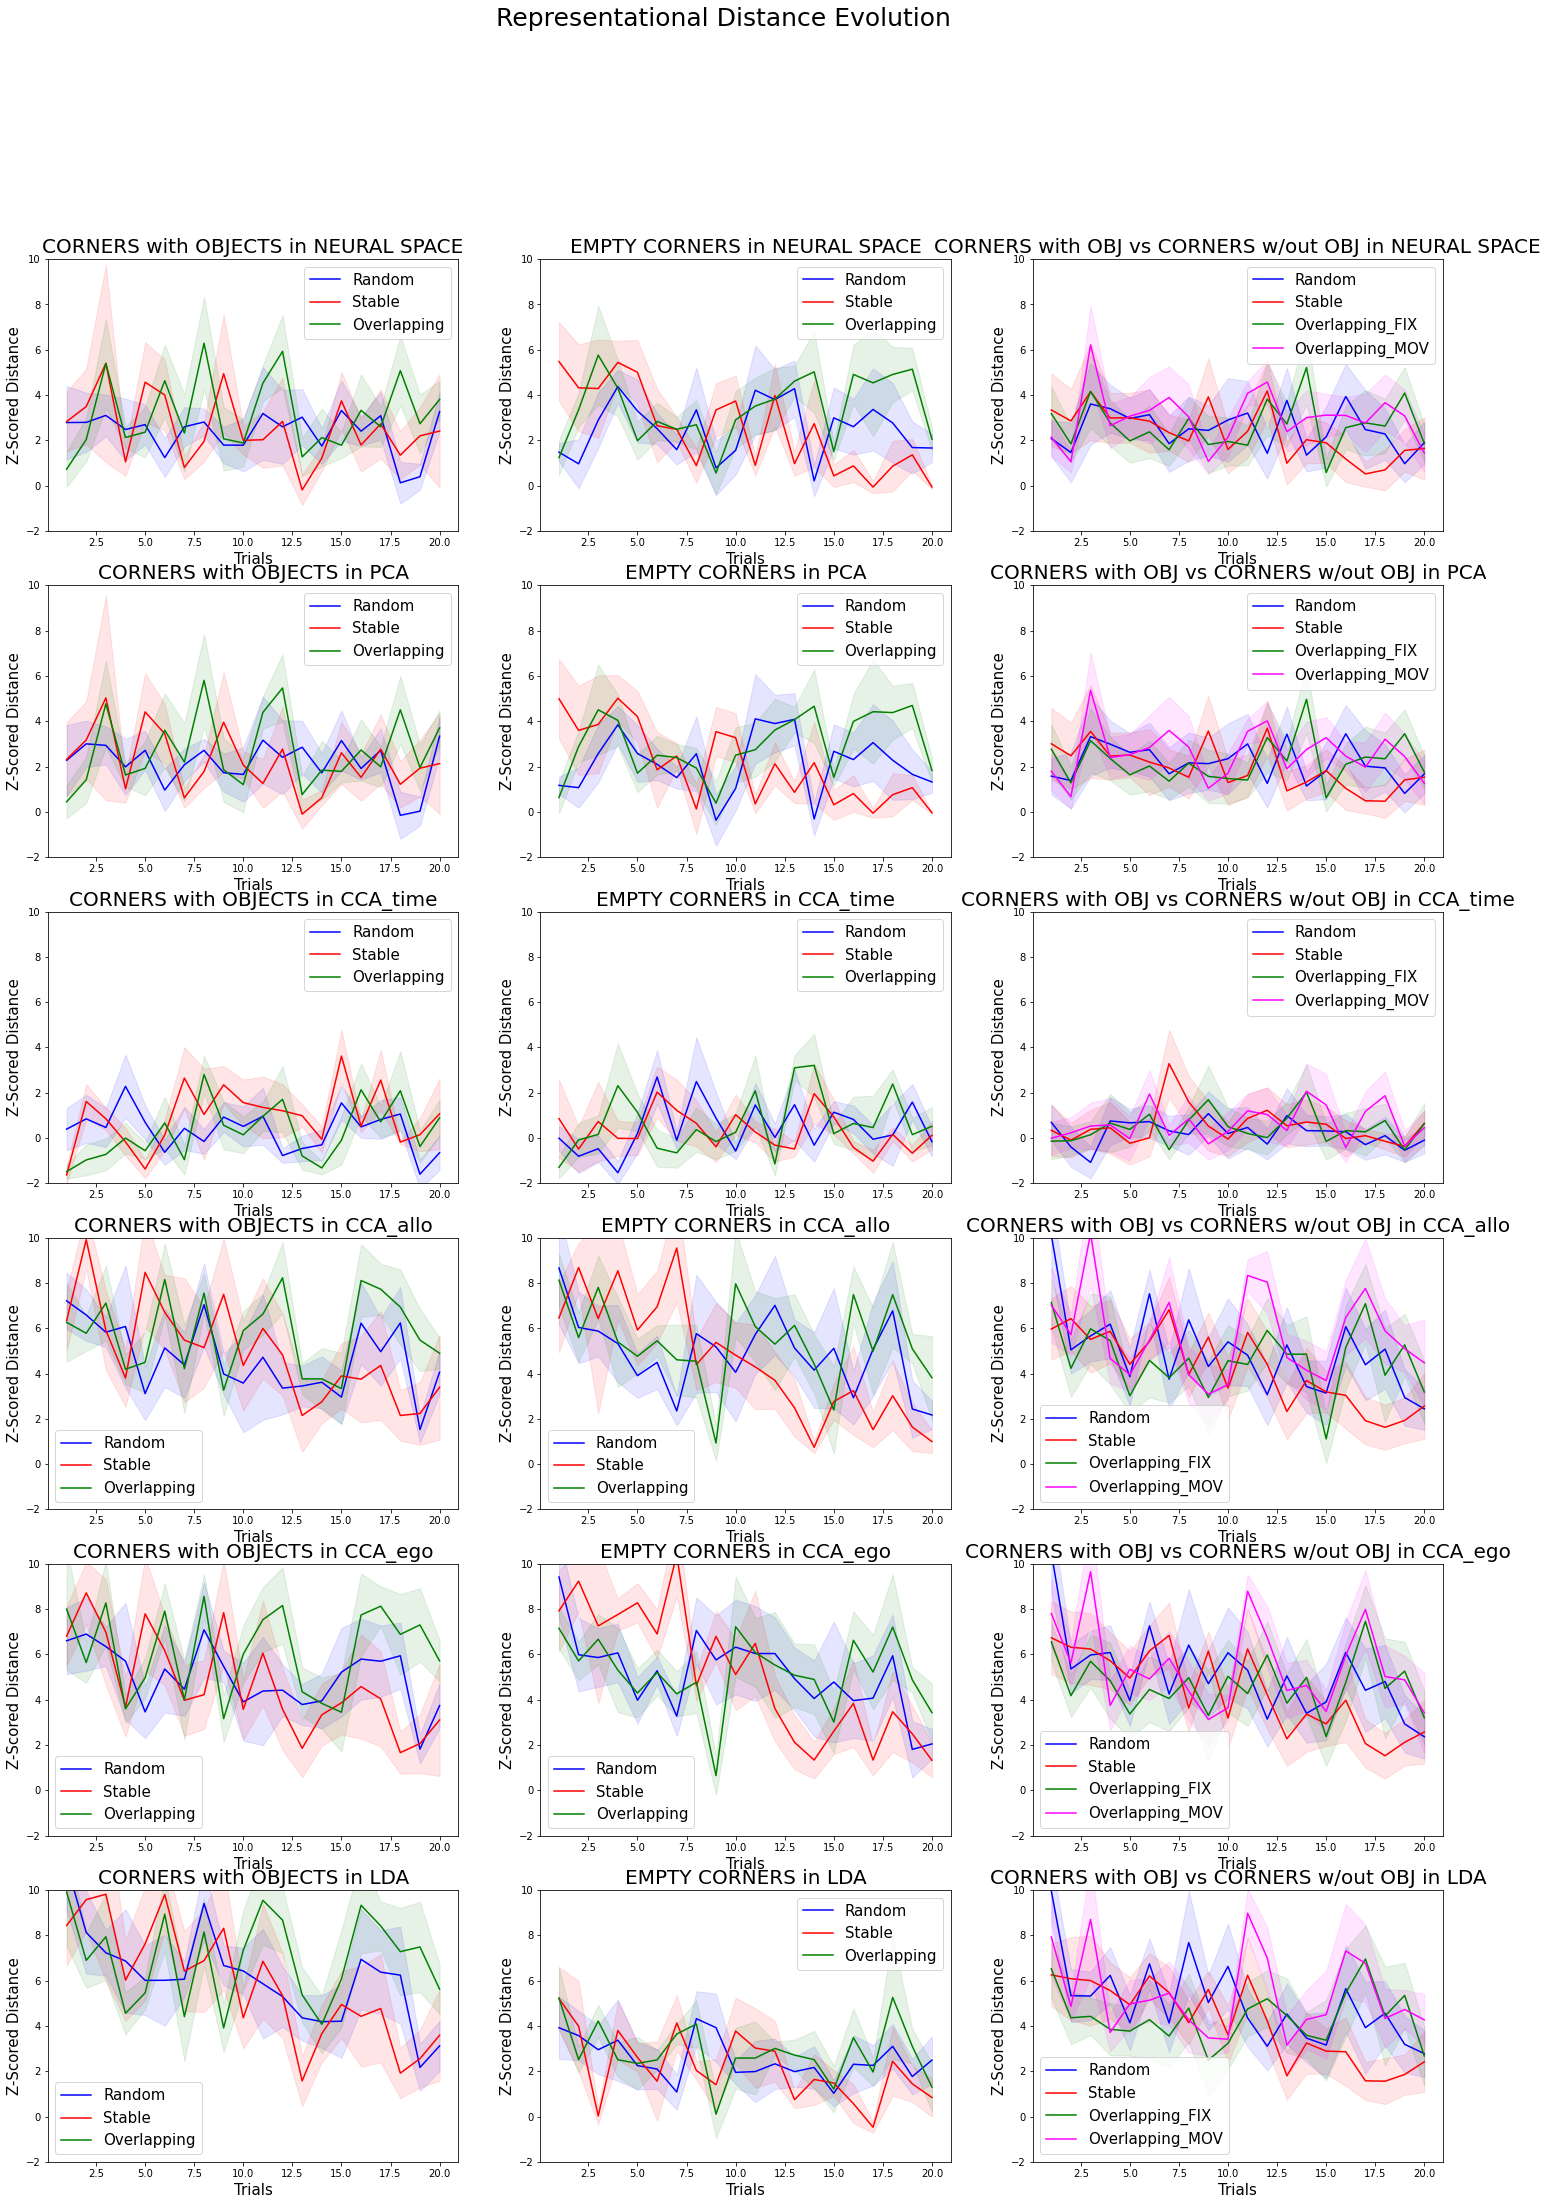

In [8]:
figure, axes = plt.subplots(6,3)
time = np.arange(1,21)

random_mean = np.mean(evolution_random, axis = 0)
random_std =  np.std(evolution_random,axis = 0)/np.sqrt(len(evolution_random))

stable_mean = np.mean(evolution_stable, axis = 0)
stable_std =  np.std(evolution_stable,axis = 0)/np.sqrt(len(evolution_stable))

overlapping_mean = np.mean(evolution_overlapping, axis = 0)
overlapping_std =  np.std(evolution_overlapping,axis = 0)/np.sqrt(len(evolution_overlapping))

random_mean2 = np.mean(evolution_random2, axis = 0)
random_std2 =  np.std(evolution_random2,axis = 0)/np.sqrt(len(evolution_random2))

stable_mean2 = np.mean(evolution_stable2, axis = 0)
stable_std2 =  np.std(evolution_stable2,axis = 0)/np.sqrt(len(evolution_stable2))

overlapping_mean2 = np.mean(evolution_overlapping2, axis = 0)
overlapping_std2 =  np.std(evolution_overlapping2,axis = 0)/np.sqrt(len(evolution_overlapping2))


random_mean3 = np.mean(evolution_random3, axis = 1)
random_std3 =  np.std(evolution_random3,axis = 1)/np.sqrt(len(evolution_random3))

stable_mean3 = np.mean(evolution_stable3, axis = 1)
stable_std3 =  np.std(evolution_stable3,axis = 1)/np.sqrt(len(evolution_stable3))


overlapping_mean3_fix = np.mean(evolution_overlapping3_fix, axis = 1)
overlapping_std3_fix =  np.std(evolution_overlapping3_fix,axis = 1)/np.sqrt(len(evolution_overlapping3_fix))

overlapping_mean3_mov = np.mean(evolution_overlapping3_mov, axis = 1)
overlapping_std3_mov =  np.std(evolution_overlapping3_mov,axis = 1)/np.sqrt(len(evolution_overlapping3_mov))



label = ['NEURAL SPACE','PCA','CCA_time','CCA_allo','CCA_ego','LDA']


for i in range(6):

    axes[i,0].plot(time,random_mean[i],'b')
    axes[i,0].fill_between(time,random_mean[i]-random_std[i],random_mean[i]+random_std[i],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

    axes[i,0].plot(time,stable_mean[i],'r')
    axes[i,0].fill_between(time,stable_mean[i]-stable_std[i],stable_mean[i]+stable_std[i],alpha = 0.1, edgecolor = 'r', facecolor = 'r')

    axes[i,0].plot(time,overlapping_mean[i],'g')
    axes[i,0].fill_between(time,overlapping_mean[i]-overlapping_std[i],overlapping_mean[i]+overlapping_std[i],alpha = 0.1, edgecolor = 'g', facecolor = 'g')

    axes[i,1].plot(time,random_mean2[i],'b')
    axes[i,1].fill_between(time,random_mean2[i]-random_std2[i],random_mean2[i]+random_std2[i],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

    axes[i,1].plot(time,stable_mean2[i],'r')
    axes[i,1].fill_between(time,stable_mean2[i]-stable_std2[i],stable_mean2[i]+stable_std2[i],alpha = 0.1, edgecolor = 'r', facecolor = 'r')

    axes[i,1].plot(time,overlapping_mean2[i],'g')
    axes[i,1].fill_between(time,overlapping_mean2[i]-overlapping_std2[i],overlapping_mean2[i]+overlapping_std2[i],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
    
    axes[i,2].plot(time,random_mean3[i],'b')
    axes[i,2].fill_between(time,random_mean3[i]-random_std3[i],random_mean3[i]+random_std3[i],alpha = 0.1, edgecolor = 'b', facecolor = 'b')
    
    axes[i,2].plot(time,stable_mean3[i],'r')
    axes[i,2].fill_between(time,stable_mean3[i]-stable_std3[i],stable_mean3[i]+stable_std3[i],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
    
    axes[i,2].plot(time,overlapping_mean3_fix[i],'g')
    axes[i,2].fill_between(time,overlapping_mean3_fix[i]-overlapping_std3_fix[i],overlapping_mean3_fix[i]+overlapping_std3_fix[i],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
 
    axes[i,2].plot(time,overlapping_mean3_mov[i],'magenta')
    axes[i,2].fill_between(time,overlapping_mean3_mov[i]-overlapping_std3_mov[i],overlapping_mean3_mov[i]+overlapping_std3_mov[i],alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')
  
    
    axes[i,0].set_title('CORNERS with OBJECTS in ' + label[i],fontsize = 20)
    axes[i,1].set_title('EMPTY CORNERS in ' + label[i], fontsize = 20)
    axes[i,2].set_title('CORNERS with OBJ vs CORNERS w/out OBJ in ' + label[i], fontsize = 20)

    axes[i,0].set_xlabel('Trials', fontsize = 15)
    axes[i,1].set_xlabel('Trials', fontsize = 15)
    axes[i,2].set_xlabel('Trials', fontsize = 15)

    axes[i,0].set_ylim([-2, 10])
    axes[i,1].set_ylim([-2, 10])
    axes[i,2].set_ylim([-2, 10])

    axes[i,0].legend(['Random','Stable','Overlapping'],fontsize = 15)
    axes[i,1].legend(['Random','Stable','Overlapping'], fontsize = 15)
    axes[i,2].legend(['Random','Stable','Overlapping_FIX','Overlapping_MOV'], fontsize = 15)

    axes[i,0].set_ylabel('Z-Scored Distance', fontsize = 15)
    axes[i,1].set_ylabel('Z-Scored Distance', fontsize = 15)
    axes[i,2].set_ylabel('Z-Scored Distance', fontsize = 15)

figure.suptitle('Representational Distance Evolution', fontsize = 25)
    
figure.set_size_inches([25,35])
figure_name = 'representational_distance_evolution.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_path + figure_name)

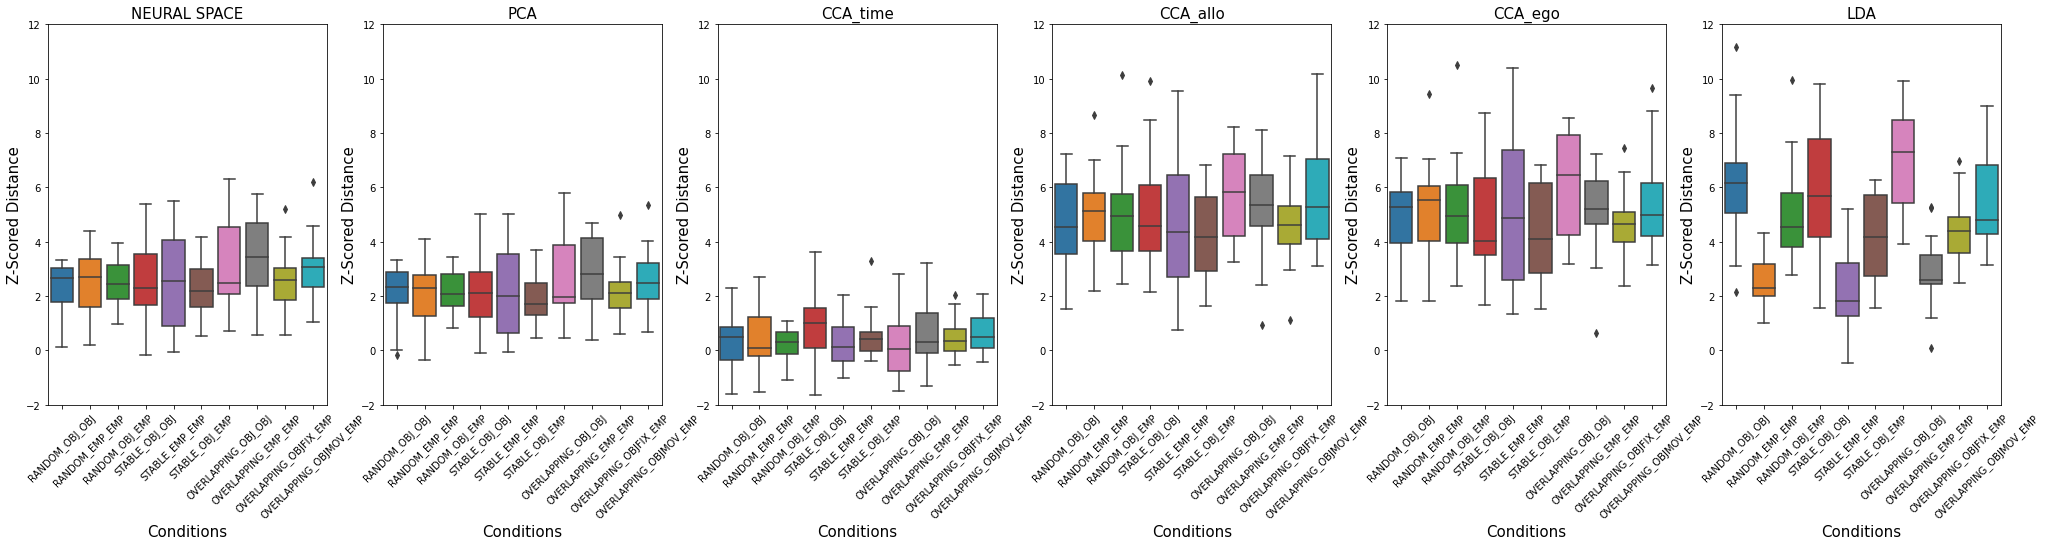

In [9]:
figure = plt.figure()
gs = plt.GridSpec(1,6)

# = ['RANDOM','OVERLAPPING','STABLE','RANDOM_trial','OVERLAPPING_trial','STABLE_trial']
label2 = ['RANDOM_OBJ_OBJ','RANDOM_EMP_EMP','RANDOM_OBJ_EMP','STABLE_OBJ_OBJ','STABLE_EMP_EMP','STABLE_OBJ_EMP','OVERLAPPING_OBJ_OBJ','OVERLAPPING_EMP_EMP','OVERLAPPING_OBJFIX_EMP','OVERLAPPING_OBJMOV_EMP']


for i in range(6):
    
    plot_list = [[random_mean[i]],[random_mean2[i]],[random_mean3[i]],[stable_mean[i]],[stable_mean2[i]],[stable_mean3[i]],[overlapping_mean[i]],[overlapping_mean2[i]],[overlapping_mean3_fix[i]],[overlapping_mean3_mov[i]]]
    
    ax1 = figure.add_subplot(gs[0,i])
    
    ax1.set_title(label[i],fontsize = 15)
    ax1.set_xlabel('Conditions', fontsize = 15)
    ax1.set_ylabel('Z-Scored Distance',fontsize = 15)
    ax1 = sns.boxplot(data = plot_list, orient = 'v')
    ax1.set_xticklabels(label2)
    ax1.set_xticklabels(label2)
    ax1.set_ylim([-2,12])
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
        
figure.set_size_inches([35,7])
figure_name = 'representational_distance_evolution_mean.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_path + figure_name)

In [10]:
index_corners_trial = np.zeros((4,2,20))
for corner in range(4):
    for day in range(4):
        for trial in range(5):
            i = day * 5 + trial
            if i < 19:
                index_corners_trial[corner,0,i] = int(day * 20 + trial * 4 + corner)
                index_corners_trial[corner,1,i] = int(day * 20 + (trial+1) * 4 + corner)      
index_corners_trial = index_corners_trial.astype(int)  

define_zero = [4,9,14,19]
for corner in range(4):
    index_corners_trial[corner][:,define_zero] = -1

print(index_corners_trial)

[[[ 0  4  8 12 -1 20 24 28 32 -1 40 44 48 52 -1 60 64 68 72 -1]
  [ 4  8 12 16 -1 24 28 32 36 -1 44 48 52 56 -1 64 68 72 76 -1]]

 [[ 1  5  9 13 -1 21 25 29 33 -1 41 45 49 53 -1 61 65 69 73 -1]
  [ 5  9 13 17 -1 25 29 33 37 -1 45 49 53 57 -1 65 69 73 77 -1]]

 [[ 2  6 10 14 -1 22 26 30 34 -1 42 46 50 54 -1 62 66 70 74 -1]
  [ 6 10 14 18 -1 26 30 34 38 -1 46 50 54 58 -1 66 70 74 78 -1]]

 [[ 3  7 11 15 -1 23 27 31 35 -1 43 47 51 55 -1 63 67 71 75 -1]
  [ 7 11 15 19 -1 27 31 35 39 -1 47 51 55 59 -1 67 71 75 79 -1]]]


In [11]:
evolution_random_cor1 = []
evolution_overlapping_cor1 = []
evolution_stable_cor1 = []

evolution_random_cor2 = []
evolution_overlapping_cor2 = []
evolution_stable_cor2 = []

evolution_random_cor3 = []
evolution_overlapping_cor3 = []
evolution_stable_cor3 = []

evolution_random_cor4 = []
evolution_overlapping_cor4 = []
evolution_stable_cor4 = []


for i in range(len(random)):
    evolution_random_cor1_ = []
    evolution_random_cor2_ = []
    evolution_random_cor3_ = []
    evolution_random_cor4_ = []
    for j in range(random[0].shape[0]):
        #index = np.where(index_corners_trial[0][0,:])[0]
        index = np.arange(0,index_corners_trial[0].shape[1])
        evolution_random_cor1_.append(random[i][j,index_corners_trial[0][0,index],index_corners_trial[0][1,index]])
        evolution_random_cor2_.append(random[i][j,index_corners_trial[1][0,index],index_corners_trial[1][1,index]])
        evolution_random_cor3_.append(random[i][j,index_corners_trial[2][0,index],index_corners_trial[2][1,index]])
        evolution_random_cor4_.append(random[i][j,index_corners_trial[3][0,index],index_corners_trial[3][1,index]])
    evolution_random_cor1.append(evolution_random_cor1_)
    evolution_random_cor2.append(evolution_random_cor2_)  
    evolution_random_cor3.append(evolution_random_cor3_)  
    evolution_random_cor4.append(evolution_random_cor4_)  

for i in range(len(stable)):
    evolution_stable_cor1_ = []
    evolution_stable_cor2_ = []
    evolution_stable_cor3_ = []
    evolution_stable_cor4_ = []
    for j in range(stable[0].shape[0]):
        #index = np.where(index_corners_trial[0][0,:])[0]
        index = np.arange(0,index_corners_trial[0].shape[1])
        evolution_stable_cor1_.append(stable[i][j,index_corners_trial[0][0,index],index_corners_trial[0][1,index]])
        evolution_stable_cor2_.append(stable[i][j,index_corners_trial[1][0,index],index_corners_trial[1][1,index]])
        evolution_stable_cor3_.append(stable[i][j,index_corners_trial[2][0,index],index_corners_trial[2][1,index]])
        evolution_stable_cor4_.append(stable[i][j,index_corners_trial[3][0,index],index_corners_trial[3][1,index]])
    evolution_stable_cor1.append(evolution_stable_cor1_)
    evolution_stable_cor2.append(evolution_stable_cor2_)  
    evolution_stable_cor3.append(evolution_stable_cor3_)  
    evolution_stable_cor4.append(evolution_stable_cor4_)  
    
for i in range(len(overlapping)):
    evolution_overlapping_cor1_ = []
    evolution_overlapping_cor2_ = []
    evolution_overlapping_cor3_ = []
    evolution_overlapping_cor4_ = []
    for j in range(random[0].shape[0]):
        #index = np.where(index_corners_trial[0][0,:])[0]
        index = np.arange(0,index_corners_trial[0].shape[1])
        evolution_overlapping_cor1_.append(overlapping[i][j,index_corners_trial[0][0,index],index_corners_trial[0][1,index]])
        evolution_overlapping_cor2_.append(overlapping[i][j,index_corners_trial[1][0,index],index_corners_trial[1][1,index]])
        evolution_overlapping_cor3_.append(overlapping[i][j,index_corners_trial[2][0,index],index_corners_trial[2][1,index]])
        evolution_overlapping_cor4_.append(overlapping[i][j,index_corners_trial[3][0,index],index_corners_trial[3][1,index]])
    evolution_overlapping_cor1.append(evolution_overlapping_cor1_)
    evolution_overlapping_cor2.append(evolution_overlapping_cor2_)  
    evolution_overlapping_cor3.append(evolution_overlapping_cor3_)  
    evolution_overlapping_cor4.append(evolution_overlapping_cor4_)  
    
    

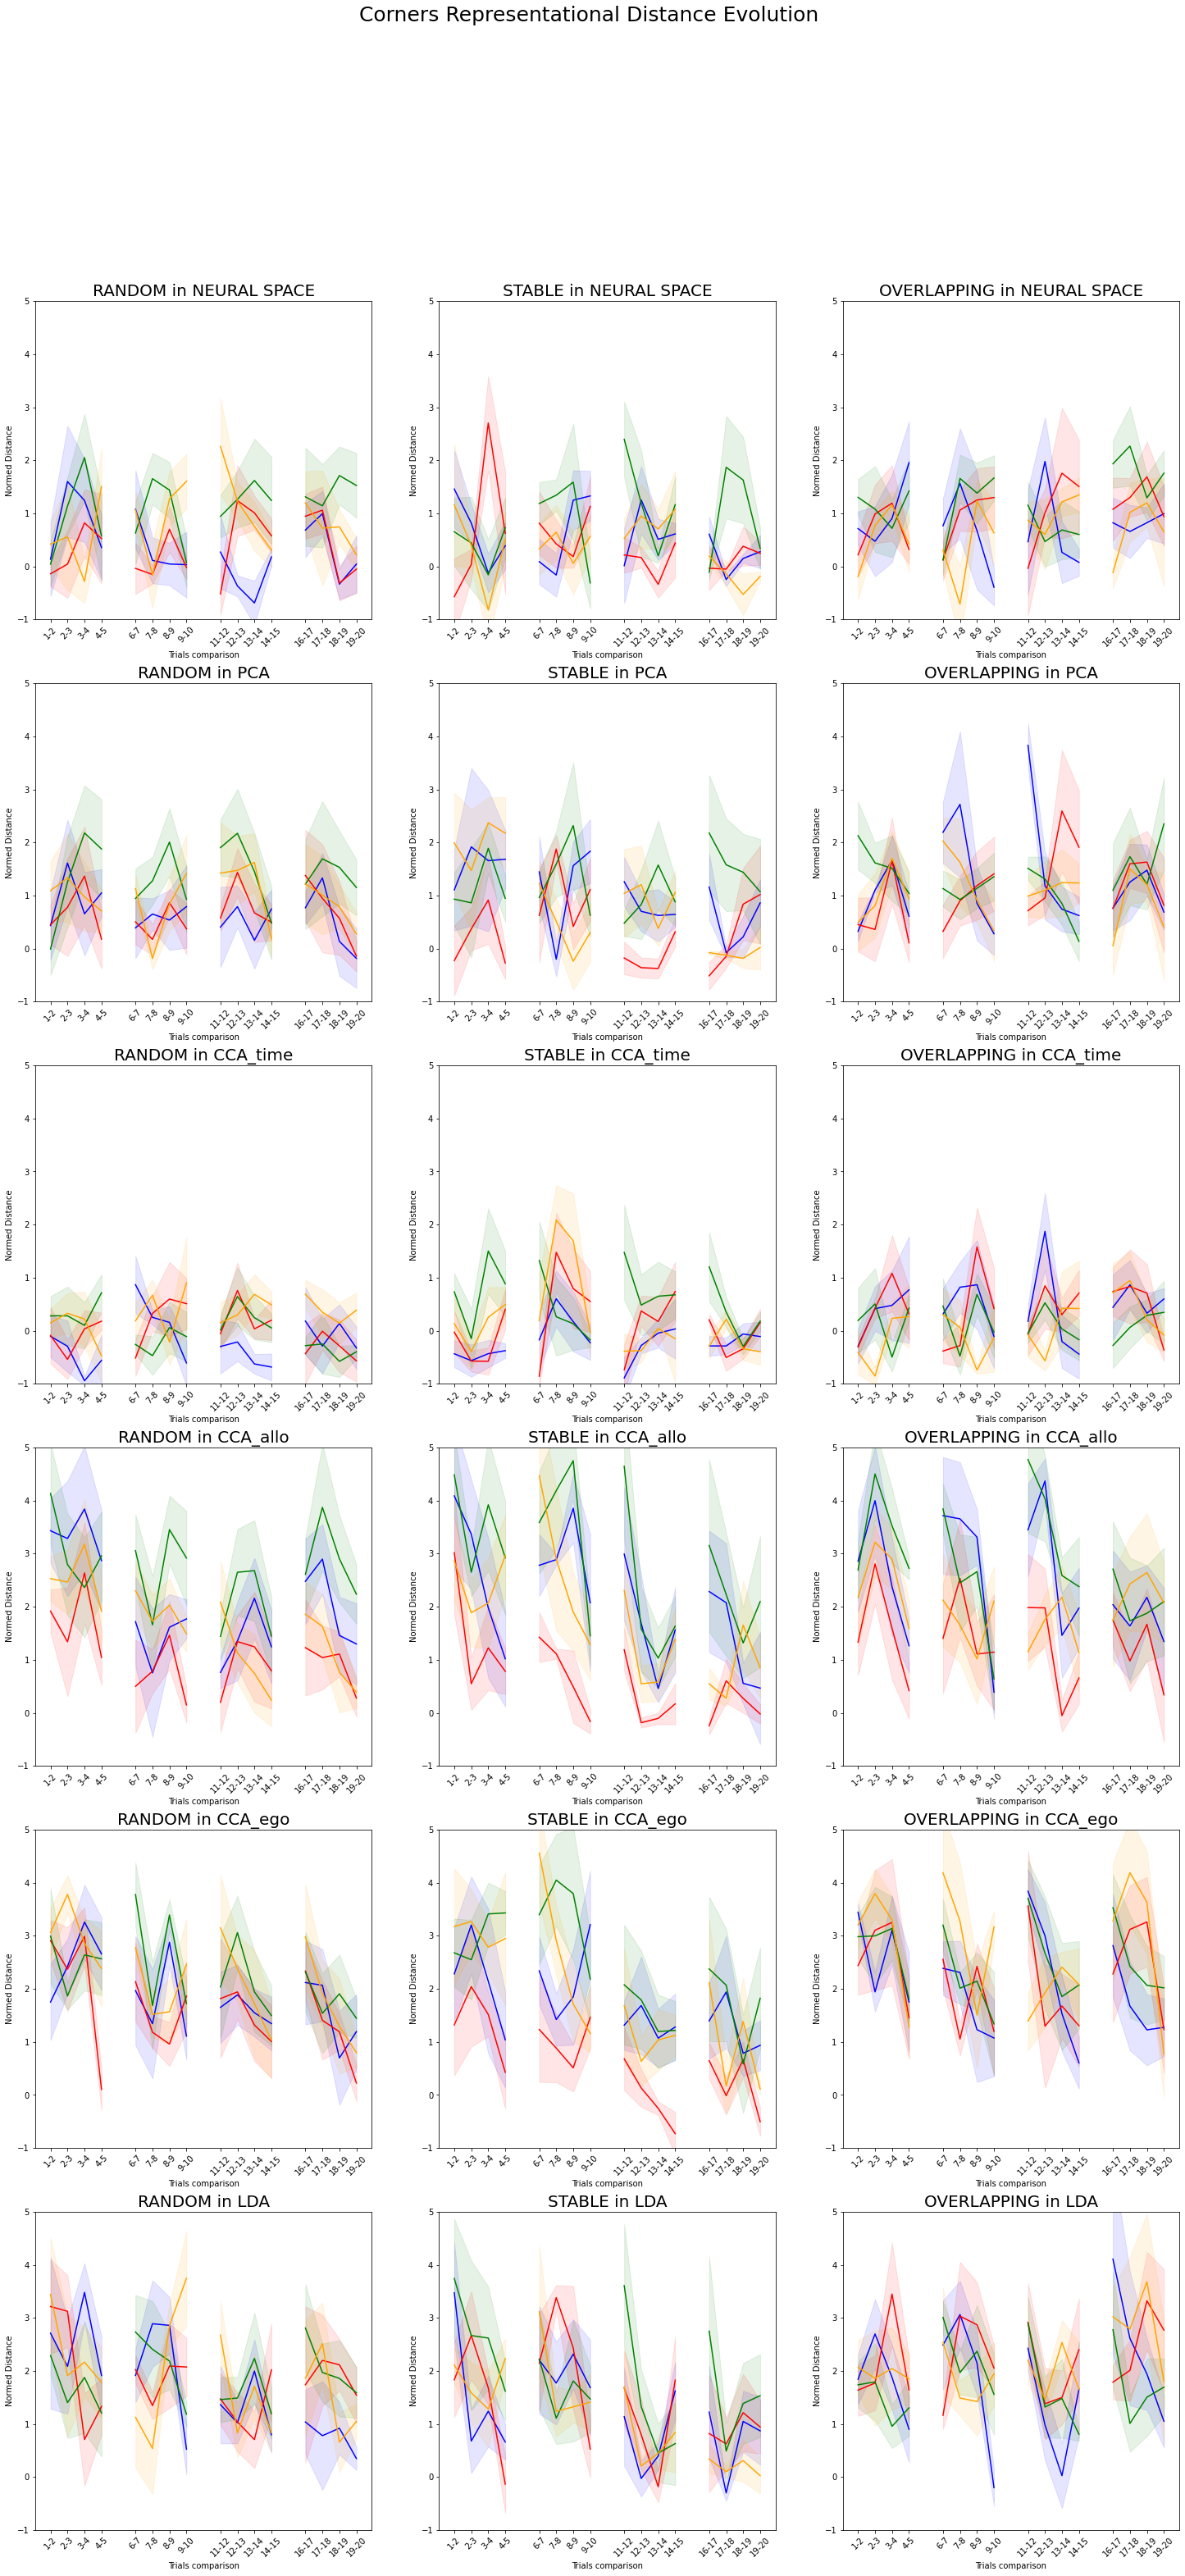

In [12]:
figure, axes = plt.subplots(6,3)
time = np.arange(1,21)

random_mean1 = np.mean(evolution_random_cor1, axis = 0)
random_std1 =  np.std(evolution_random_cor1,axis = 0)/np.sqrt(len(evolution_random_cor1))
random_mean2 = np.mean(evolution_random_cor2, axis = 0)
random_std2 =  np.std(evolution_random_cor2,axis = 0)/np.sqrt(len(evolution_random_cor2))
random_mean3 = np.mean(evolution_random_cor3, axis = 0)
random_std3 =  np.std(evolution_random_cor3,axis = 0)/np.sqrt(len(evolution_random_cor3))
random_mean4 = np.mean(evolution_random_cor4, axis = 0)
random_std4 =  np.std(evolution_random_cor4,axis = 0)/np.sqrt(len(evolution_random_cor4))

stable_mean1 = np.mean(evolution_stable_cor1, axis = 0)
stable_std1 =  np.std(evolution_stable_cor1,axis = 0)/np.sqrt(len(evolution_stable_cor1))
stable_mean2 = np.mean(evolution_stable_cor2, axis = 0)
stable_std2 =  np.std(evolution_stable_cor2,axis = 0)/np.sqrt(len(evolution_stable_cor2))
stable_mean3 = np.mean(evolution_stable_cor3, axis = 0)
stable_std3 =  np.std(evolution_stable_cor3,axis = 0)/np.sqrt(len(evolution_stable_cor3))
stable_mean4 = np.mean(evolution_stable_cor4, axis = 0)
stable_std4 =  np.std(evolution_stable_cor4,axis = 0)/np.sqrt(len(evolution_stable_cor4))


overlapping_mean1 = np.mean(evolution_overlapping_cor1, axis = 0)
overlapping_std1 =  np.std(evolution_overlapping_cor1,axis = 0)/np.sqrt(len(evolution_overlapping_cor1))
overlapping_mean2 = np.mean(evolution_overlapping_cor2, axis = 0)
overlapping_std2 =  np.std(evolution_overlapping_cor2,axis = 0)/np.sqrt(len(evolution_overlapping_cor2))
overlapping_mean3 = np.mean(evolution_overlapping_cor3, axis = 0)
overlapping_std3 =  np.std(evolution_overlapping_cor3,axis = 0)/np.sqrt(len(evolution_overlapping_cor3))
overlapping_mean4 = np.mean(evolution_overlapping_cor4, axis = 0)
overlapping_std4 =  np.std(evolution_overlapping_cor4,axis = 0)/np.sqrt(len(evolution_overlapping_cor4))

label = ['NEURAL SPACE','PCA','CCA_time','CCA_allo','CCA_ego','LDA']
 
trials_comparison = ['1-2','2-3','3-4','4-5','6-7','7-8','8-9','9-10','11-12','12-13','13-14','14-15','16-17','17-18','18-19','19-20']  
trials_comparison_pos = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18]
for i in range(6):

    for day in range(4):
        time = np.arange(day * 5,day*5+4)
        axes[i,0].plot(time,random_mean1[i][time],'b')
        axes[i,0].fill_between(time,random_mean1[i][time]-random_std1[i][time],random_mean1[i][time]+random_std1[i][time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')
        axes[i,0].plot(time,random_mean2[i][time],'r')
        axes[i,0].fill_between(time,random_mean2[i][time]-random_std2[i][time],random_mean2[i][time]+random_std2[i][time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
        axes[i,0].plot(time,random_mean3[i][time],'g')
        axes[i,0].fill_between(time,random_mean3[i][time]-random_std3[i][time],random_mean3[i][time]+random_std3[i][time],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
        axes[i,0].plot(time,random_mean4[i][time],'orange')
        axes[i,0].fill_between(time,random_mean4[i][time]-random_std4[i][time],random_mean4[i][time]+random_std4[i][time],alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')

        axes[i,1].plot(time,stable_mean1[i][time],'b')
        axes[i,1].fill_between(time,stable_mean1[i][time]-stable_std1[i][time],stable_mean1[i][time]+stable_std1[i][time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')
        axes[i,1].plot(time,stable_mean2[i][time],'r')
        axes[i,1].fill_between(time,stable_mean2[i][time]-stable_std2[i][time],stable_mean2[i][time]+stable_std2[i][time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
        axes[i,1].plot(time,stable_mean3[i][time],'g')
        axes[i,1].fill_between(time,stable_mean3[i][time]-stable_std3[i][time],stable_mean3[i][time]+stable_std3[i][time],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
        axes[i,1].plot(time,stable_mean4[i][time],'orange')
        axes[i,1].fill_between(time,stable_mean4[i][time]-stable_std4[i][time],stable_mean4[i][time]+stable_std4[i][time],alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')

        axes[i,2].plot(time,overlapping_mean1[i][time],'b')
        axes[i,2].fill_between(time,overlapping_mean1[i][time]-overlapping_std1[i][time],overlapping_mean1[i][time]+overlapping_std1[i][time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')
        axes[i,2].plot(time,overlapping_mean2[i][time],'r')
        axes[i,2].fill_between(time,overlapping_mean2[i][time]-overlapping_std2[i][time],overlapping_mean2[i][time]+overlapping_std2[i][time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
        axes[i,2].plot(time,overlapping_mean3[i][time],'g')
        axes[i,2].fill_between(time,overlapping_mean3[i][time]-overlapping_std3[i][time],overlapping_mean3[i][time]+overlapping_std3[i][time],alpha = 0.1, edgecolor = 'g', facecolor = 'g')
        axes[i,2].plot(time,overlapping_mean4[i][time],'orange')
        axes[i,2].fill_between(time,overlapping_mean4[i][time]-overlapping_std4[i][time],overlapping_mean4[i][time]+overlapping_std4[i][time],alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')

    for j in range(3):
        axes[i,j].set_ylim([-1,5])
        axes[i,j].set_ylabel('Normed Distance')
        axes[i,j].set_xlabel('Trials comparison')
        axes[i,j].set_xticks(trials_comparison_pos)
        axes[i,j].set_xticklabels(trials_comparison)
        for tick in axes[i,j].get_xticklabels():
            tick.set_rotation(45)
        
    axes[i,0].set_title('RANDOM in ' + label[i], fontsize = 20)
    axes[i,1].set_title('STABLE in ' + label[i], fontsize = 20)
    axes[i,2].set_title('OVERLAPPING in ' + label[i], fontsize = 20)

figure.suptitle('Corners Representational Distance Evolution', fontsize = 25)
    
figure.set_size_inches([25,50])
figure_name = 'representational_distance_evolution_corners.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_path + figure_name)      

20


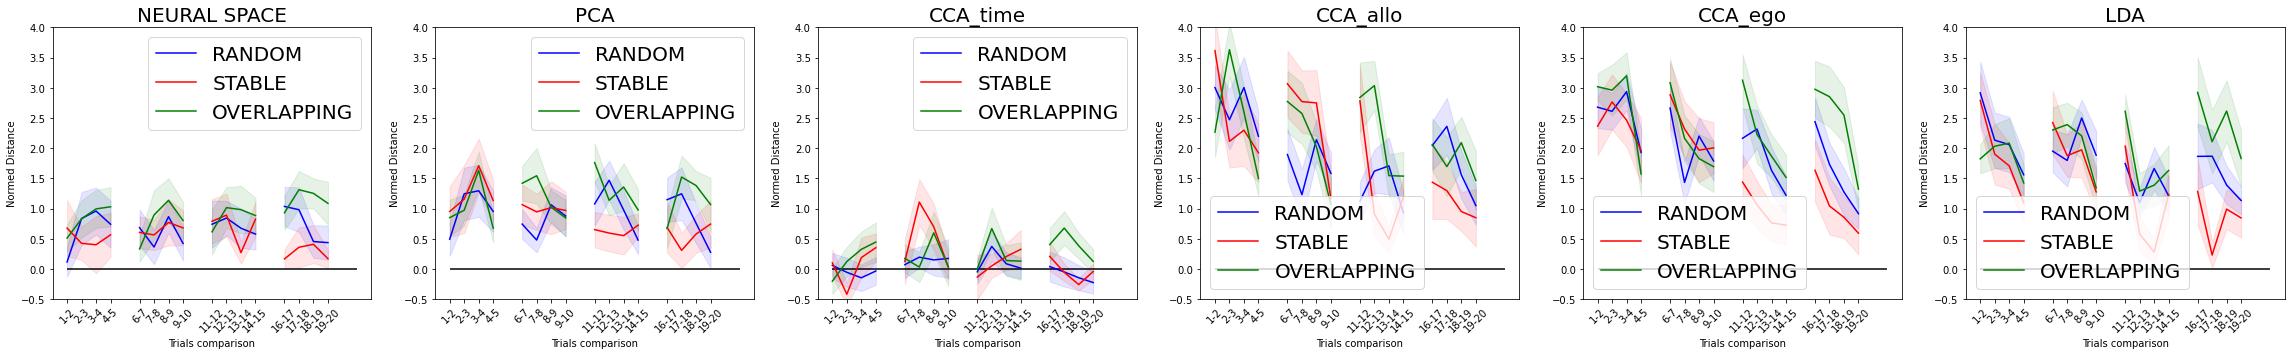

In [13]:
figure, axes = plt.subplots(1,6)
time = np.arange(1,21)

evolution_random_total = []
for i in range(len(evolution_random_cor1)):
    evolution_random_total.append(evolution_random_cor1[i])
    evolution_random_total.append(evolution_random_cor2[i])
    evolution_random_total.append(evolution_random_cor3[i])
    evolution_random_total.append(evolution_random_cor4[i])
print(len(evolution_random_total))
    
evolution_stable_total = []
for i in range(len(evolution_stable_cor1)):
    evolution_stable_total.append(evolution_stable_cor1[i])
    evolution_stable_total.append(evolution_stable_cor2[i])
    evolution_stable_total.append(evolution_stable_cor3[i])
    evolution_stable_total.append(evolution_stable_cor4[i])

evolution_overlapping_total = []
for i in range(len(evolution_overlapping_cor1)):
    evolution_overlapping_total.append(evolution_overlapping_cor1[i])
    evolution_overlapping_total.append(evolution_overlapping_cor2[i])
    evolution_overlapping_total.append(evolution_overlapping_cor3[i])
    evolution_overlapping_total.append(evolution_overlapping_cor4[i])

random_mean = np.mean(evolution_random_total, axis = 0)
random_std =  np.std(evolution_random_total,axis = 0)/np.sqrt(len(evolution_random_total))

stable_mean = np.mean(evolution_stable_total, axis = 0)
stable_std =  np.std(evolution_stable_total,axis = 0)/np.sqrt(len(evolution_stable_total))

overlapping_mean = np.mean(evolution_overlapping_total, axis = 0)
overlapping_std =  np.std(evolution_overlapping_total,axis = 0)/np.sqrt(len(evolution_overlapping_total))

label = ['NEURAL SPACE','PCA','CCA_time','CCA_allo','CCA_ego','LDA']
 
trials_comparison = ['1-2','2-3','3-4','4-5','6-7','7-8','8-9','9-10','11-12','12-13','13-14','14-15','16-17','17-18','18-19','19-20']  
trials_comparison_pos = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18]
for i in range(6):

    for day in range(4):
        time = np.arange(day * 5,day*5+4)
        axes[i].plot(time,random_mean[i][time],'b')
        axes[i].fill_between(time,random_mean[i][time]-random_std[i][time],random_mean[i][time]+random_std[i][time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

        axes[i].plot(time,stable_mean[i][time],'r')
        axes[i].fill_between(time,stable_mean[i][time]-stable_std[i][time],stable_mean[i][time]+stable_std[i][time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')

        axes[i].plot(time,overlapping_mean[i][time],'g')
        axes[i].fill_between(time,overlapping_mean[i][time]-overlapping_std[i][time],overlapping_mean[i][time]+overlapping_std[i][time],alpha = 0.1, edgecolor = 'g', facecolor = 'g')

    axes[i].set_ylim([-0.5,4])
    axes[i].set_ylabel('Normed Distance')
    axes[i].set_xlabel('Trials comparison')
    axes[i].set_xticks(trials_comparison_pos)
    axes[i].set_xticklabels(trials_comparison)
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)
    axes[i].hlines(0,0,20,color = 'k')
        
    axes[i].set_title(label[i], fontsize = 20)
    axes[i].legend(['RANDOM','STABLE','OVERLAPPING'], fontsize = 20)

#figure.suptitle('Corners Representational Distance Evolution', fontsize = 25)
    
figure.set_size_inches([40,5])
figure_name = 'representational_distance_evolution_corners_mean.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_path + figure_name)   

In [14]:
occupied_corners_random_flag = []
for i in range(len(occupied_corners_random)):
    binary_array = np.zeros((4,20))
    for j in range(20):
        obj1 = occupied_corners_random[i][0,j].astype(int)%4
        obj2 = occupied_corners_random[i][1,j].astype(int)%4
        binary_array[obj1,j] = 1
        binary_array[obj2,j] = 1
    occupied_corners_random_flag.append(binary_array)
    
occupied_corners_stable_flag = []
for i in range(len(occupied_corners_stable)):
    binary_array = np.zeros((4,20))
    for j in range(20):
        obj1 = occupied_corners_stable[i][0,j].astype(int)%4
        obj2 = occupied_corners_stable[i][1,j].astype(int)%4
        binary_array[obj1,j] = 1
        binary_array[obj2,j] = 1
    occupied_corners_stable_flag.append(binary_array)

occupied_corners_overlapping_flag = []
occupied_corners_overlapping_mov_flag = []
occupied_corners_overlapping_fix_flag = []
for i in range(len(occupied_corners_overlapping)):
    binary_array_mov = np.zeros((4,20))
    binary_array0 = np.zeros((4,20))
    binary_array_fix = np.zeros((4,20))
    for j in range(20):
        obj0 = occupied_corners_overlapping_id[i][0,j].astype(int)%4
        obj1 = occupied_corners_overlapping_id[i][1,j].astype(int)%4
        
        binary_array0[obj0,j] = 1
        binary_array0[obj1,j] = 1
        
        binary_array_mov[obj1,j] = 1
        binary_array_fix[obj0,j] = 1
        
    occupied_corners_overlapping_flag.append(binary_array0)        
    occupied_corners_overlapping_mov_flag.append(binary_array_mov)
    occupied_corners_overlapping_fix_flag.append(binary_array_fix)    

In [22]:
occupied_corners_overlapping_flag

[array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
         1., 0., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
         0., 1., 0., 0.]]),
 array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
         1., 0., 1., 0.],
        [0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
      

In [15]:
evolution_random_nav = []
evolution_overlapping_nav = []
evolution_stable_nav = []

evolution_random_obj = []
evolution_overlapping_obj_fix = []
evolution_overlapping_obj_mov = []
evolution_stable_obj = []

for i in range(len(random)):
    evolution_random_nav_ = []
    evolution_random_obj_ = []
    for j in range(random[0].shape[0]):
        
        obj_array = np.empty((20,))
        obj_array[:] = np.nan
        nav_array = np.empty((20,))
        nav_array[:] = np.nan
        
        for corner in range(4):
            diff = np.diff(occupied_corners_random_flag[i][corner,:],append = 0)
            consecutive_trials = np.logical_and(occupied_corners_random_flag[i][corner,:]==1,diff==0)
            index_obj = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
            index1 = index_corners_trial[corner][0,np.where(index_obj)[0]]
            index2 = index_corners_trial[corner][1,np.where(index_obj)[0]]
            obj_array[index_obj] = random[i][j,index1,index2]
            
            consecutive_trials = np.logical_and(occupied_corners_random_flag[i][corner,:]==0,diff==0)
            index_nav = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
            index1 = index_corners_trial[corner][0,np.where(index_nav)[0]]
            index2 = index_corners_trial[corner][1,np.where(index_nav)[0]]
            nav_array[index_nav] =  random[i][j,index1,index2]
            
        evolution_random_obj_.append(obj_array)
        evolution_random_nav_.append(nav_array)
    evolution_random_obj.append(evolution_random_obj_)
    evolution_random_nav.append(evolution_random_nav_)  

for i in range(len(stable)):
    evolution_stable_nav_ = []
    evolution_stable_obj_ = []
    for j in range(stable[0].shape[0]):
        
        obj_array = np.empty((20,))
        obj_array[:] = np.nan
        nav_array = np.empty((20,))
        nav_array[:] = np.nan
        
        for corner in range(4):
            diff = np.diff(occupied_corners_stable_flag[i][corner,:],append = 0)
            consecutive_trials = np.logical_and(occupied_corners_stable_flag[i][corner,:]==1,diff==0)
            index_obj = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
            index1 = index_corners_trial[corner][0,np.where(index_obj)[0]]
            index2 = index_corners_trial[corner][1,np.where(index_obj)[0]]
            positions = np.where(index_obj==True)
            obj_array[positions] = stable[i][j,index1,index2]
            
            consecutive_trials = np.logical_and(occupied_corners_stable_flag[i][corner,:]==0,diff==0)
            index_nav = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
            index1 = index_corners_trial[corner][0,np.where(index_nav)[0]]
            index2 = index_corners_trial[corner][1,np.where(index_nav)[0]]
            nav_array[index_nav] =  stable[i][j,index1,index2]
        evolution_stable_obj_.append(obj_array)
        evolution_stable_nav_.append(nav_array)
    evolution_stable_obj.append(evolution_stable_obj_)
    evolution_stable_nav.append(evolution_stable_nav_)  


for i in range(len(overlapping)):
    evolution_overlapping_nav_ = []
    evolution_overlapping_obj_fix_ = []
    evolution_overlapping_obj_mov_ = []
    
    for j in range(stable[0].shape[0]):
        
        obj_array_mov = np.empty((20,))
        obj_array_mov[:] = np.nan
        obj_array_fix = np.empty((20,))
        obj_array_fix[:] = np.nan
        nav_array = np.empty((20,))
        nav_array[:] = np.nan
        
        for corner in range(4):
            consecutive_trials = np.logical_and(occupied_corners_overlapping_mov_flag[i][corner,:]==1,diff==0)
            print(consecutive_trials)
            index_obj = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
            index1 = index_corners_trial[corner][0,np.where(index_obj)[0]]
            index2 = index_corners_trial[corner][1,np.where(index_obj)[0]]
            positions = np.where(index_obj==True)
            print(i)
            print(positions)
            obj_array_mov[positions] = overlapping[i][j,index1,index2]
            
            diff = np.diff(occupied_corners_overlapping_fix_flag[i][corner,:],append = 0)
            consecutive_trials = np.logical_and(occupied_corners_overlapping_fix_flag[i][corner,:]==1,diff==0)
            index_obj = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
            index1 = index_corners_trial[corner][0,np.where(index_obj)[0]]
            index2 = index_corners_trial[corner][1,np.where(index_obj)[0]]
            positions = np.where(index_obj==True)
            obj_array_fix[positions] = overlapping[i][j,index1,index2]
            
            diff = np.diff(occupied_corners_overlapping_flag[i][corner,:],append = 0)
            consecutive_trials = np.logical_and(occupied_corners_overlapping_flag[i][corner,:]==0,diff==0)
            index_nav = np.logical_and(index_corners_trial[corner][0,:]>=0,consecutive_trials)
            index1 = index_corners_trial[corner][0,np.where(index_nav)[0]]
            index2 = index_corners_trial[corner][1,np.where(index_nav)[0]]
            nav_array[index_nav] =  overlapping[i][j,index1,index2]
            
        evolution_overlapping_obj_mov_.append(obj_array_mov)
        evolution_overlapping_obj_fix_.append(obj_array_fix)
        evolution_overlapping_nav_.append(nav_array)
        
    evolution_overlapping_obj_mov.append(evolution_overlapping_obj_mov_)
    evolution_overlapping_obj_fix.append(evolution_overlapping_obj_fix_)
    evolution_overlapping_nav.append(evolution_overlapping_nav_)


[False  True False False False False False  True False False  True False
 False False False False False False False  True]
0
(array([ 1,  7, 10]),)
[False False False False  True False False False  True False False False
  True False  True False  True False False False]
0
(array([ 8, 12, 16]),)
[False False False False False False False False False False False False
 False False False False False False False False]
0
(array([], dtype=int64),)
[False False  True  True False  True False False False  True False  True
 False  True False  True False  True False False]
0
(array([ 2,  3,  5, 11, 13, 15, 17]),)
[False False False False False False False  True False False False False
 False False False False False False False  True]
0
(array([7]),)
[False False False False  True False False False  True False False False
  True False  True False  True False False False]
0
(array([ 8, 12, 16]),)
[False False False False False False False False False False False False
 False False False False Fals

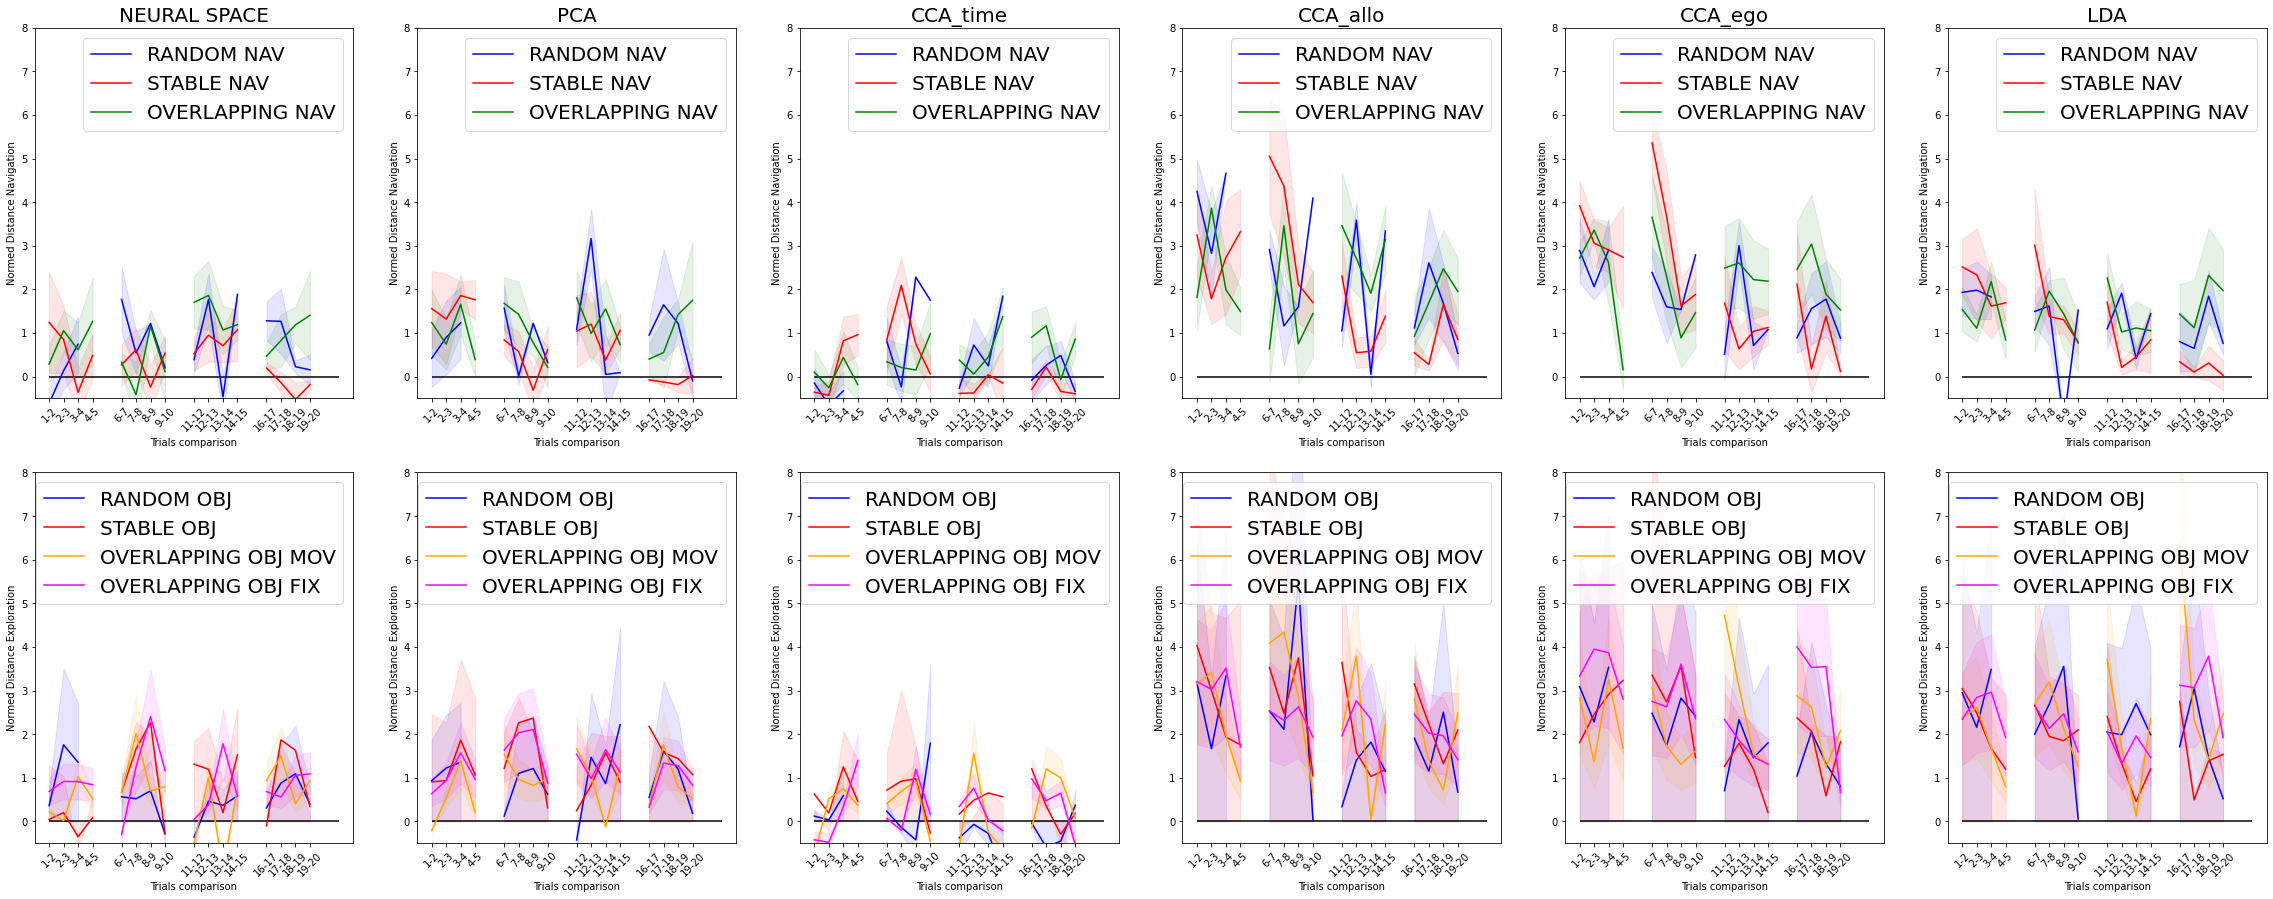

In [16]:

mean_evolution_random_nav = np.nanmean(evolution_random_nav, axis = 0)
mean_evolution_random_nav_std = np.nanstd(evolution_random_nav, axis = 0)/np.sqrt(len(evolution_random_nav))
mean_evolution_random_obj = np.nanmean(evolution_random_obj, axis = 0)
mean_evolution_random_obj_std = np.nanmean(evolution_random_obj, axis = 0)/np.sqrt(len(evolution_random_nav))

mean_evolution_stable_nav = np.nanmean(evolution_stable_nav, axis = 0)
mean_evolution_stable_nav_std = np.nanstd(evolution_stable_nav, axis = 0)/np.sqrt(len(evolution_stable_nav))
mean_evolution_stable_obj = np.nanmean(evolution_stable_obj, axis = 0)
mean_evolution_stable_obj_std = np.mean(evolution_stable_obj, axis = 0)/np.sqrt(len(evolution_stable_nav))

mean_evolution_overlapping_nav = np.nanmean(evolution_overlapping_nav, axis = 0)
mean_evolution_overlapping_nav_std = np.nanstd(evolution_overlapping_nav, axis = 0)/np.sqrt(len(evolution_overlapping_nav))
mean_evolution_overlapping_obj_mov = np.nanmean(evolution_overlapping_obj_mov, axis = 0)
mean_evolution_overlapping_obj_mov_std = np.nanmean(evolution_overlapping_obj_mov, axis = 0)/np.sqrt(len(evolution_overlapping_nav))
mean_evolution_overlapping_obj_fix = np.nanmean(evolution_overlapping_obj_fix, axis = 0)
mean_evolution_overlapping_obj_fix_std = np.nanmean(evolution_overlapping_obj_fix, axis = 0)/np.sqrt(len(evolution_overlapping_nav))

figure, axes = plt.subplots(2,6)
time = np.arange(1,21)

label = ['NEURAL SPACE','PCA','CCA_time','CCA_allo','CCA_ego','LDA']
 
trials_comparison = ['1-2','2-3','3-4','4-5','6-7','7-8','8-9','9-10','11-12','12-13','13-14','14-15','16-17','17-18','18-19','19-20']  
trials_comparison_pos = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18]
for i in range(6):

    for day in range(4):
        time = np.arange(day * 5,day*5+4)
        axes[0,i].plot(time,mean_evolution_random_nav[i][time],'b')
        axes[0,i].fill_between(time,mean_evolution_random_nav[i][time]-mean_evolution_random_nav_std[i][time],mean_evolution_random_nav[i][time]+mean_evolution_random_nav_std[i][time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

        axes[0,i].plot(time,mean_evolution_stable_nav[i][time],'r')
        axes[0,i].fill_between(time,mean_evolution_stable_nav[i][time]-mean_evolution_stable_nav_std[i][time],mean_evolution_stable_nav[i][time]+mean_evolution_stable_nav_std[i][time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')

        axes[0,i].plot(time,mean_evolution_overlapping_nav[i][time],'g')
        axes[0,i].fill_between(time,mean_evolution_overlapping_nav[i][time]-mean_evolution_overlapping_nav_std[i][time],mean_evolution_overlapping_nav[i][time]+mean_evolution_overlapping_nav_std[i][time],alpha = 0.1, edgecolor = 'g', facecolor = 'g')

        axes[1,i].plot(time,mean_evolution_random_obj[i][time],'b')
        axes[1,i].fill_between(time,mean_evolution_random_obj[i][time]-mean_evolution_random_obj[i][time],mean_evolution_random_obj[i][time]+mean_evolution_random_obj[i][time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

        axes[1,i].plot(time,mean_evolution_stable_obj[i][time],'r')
        axes[1,i].fill_between(time,mean_evolution_stable_obj[i][time]-mean_evolution_stable_obj[i][time],mean_evolution_stable_nav[i][time]+mean_evolution_stable_obj[i][time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
        
        axes[1,i].plot(time,mean_evolution_overlapping_obj_mov[i][time],'orange')
        axes[1,i].fill_between(time,mean_evolution_overlapping_obj_mov[i][time]-mean_evolution_overlapping_obj_mov_std[i][time],mean_evolution_overlapping_obj_mov[i][time]+mean_evolution_overlapping_obj_mov_std[i][time],alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')

        axes[1,i].plot(time,mean_evolution_overlapping_obj_fix[i][time],'magenta')
        axes[1,i].fill_between(time,mean_evolution_overlapping_obj_fix[i][time]-mean_evolution_overlapping_obj_fix_std[i][time],mean_evolution_overlapping_obj_fix[i][time]+mean_evolution_overlapping_obj_fix_std[i][time],alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')
    
    
    for j in  range(2):
        axes[j,i].set_ylim([-0.5,8])
        axes[j,i].set_xlabel('Trials comparison')
        axes[j,i].set_xticks(trials_comparison_pos)
        axes[j,i].set_xticklabels(trials_comparison)
        for tick in axes[j,i].get_xticklabels():
            tick.set_rotation(45)
        axes[j,i].hlines(0,0,20,color = 'k')

    axes[0,i].set_ylabel('Normed Distance Navigation')
    axes[1,i].set_ylabel('Normed Distance Exploration')
   
    axes[0,i].set_title(label[i], fontsize = 20)
    axes[0,i].legend(['RANDOM NAV','STABLE NAV','OVERLAPPING NAV'], fontsize = 20)
    axes[1,i].legend(['RANDOM OBJ','STABLE OBJ','OVERLAPPING OBJ MOV','OVERLAPPING OBJ FIX'], fontsize = 20)

figure.set_size_inches([40,15])
figure_name = 'representational_distance_evolution_behaviours.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_path + figure_name) 

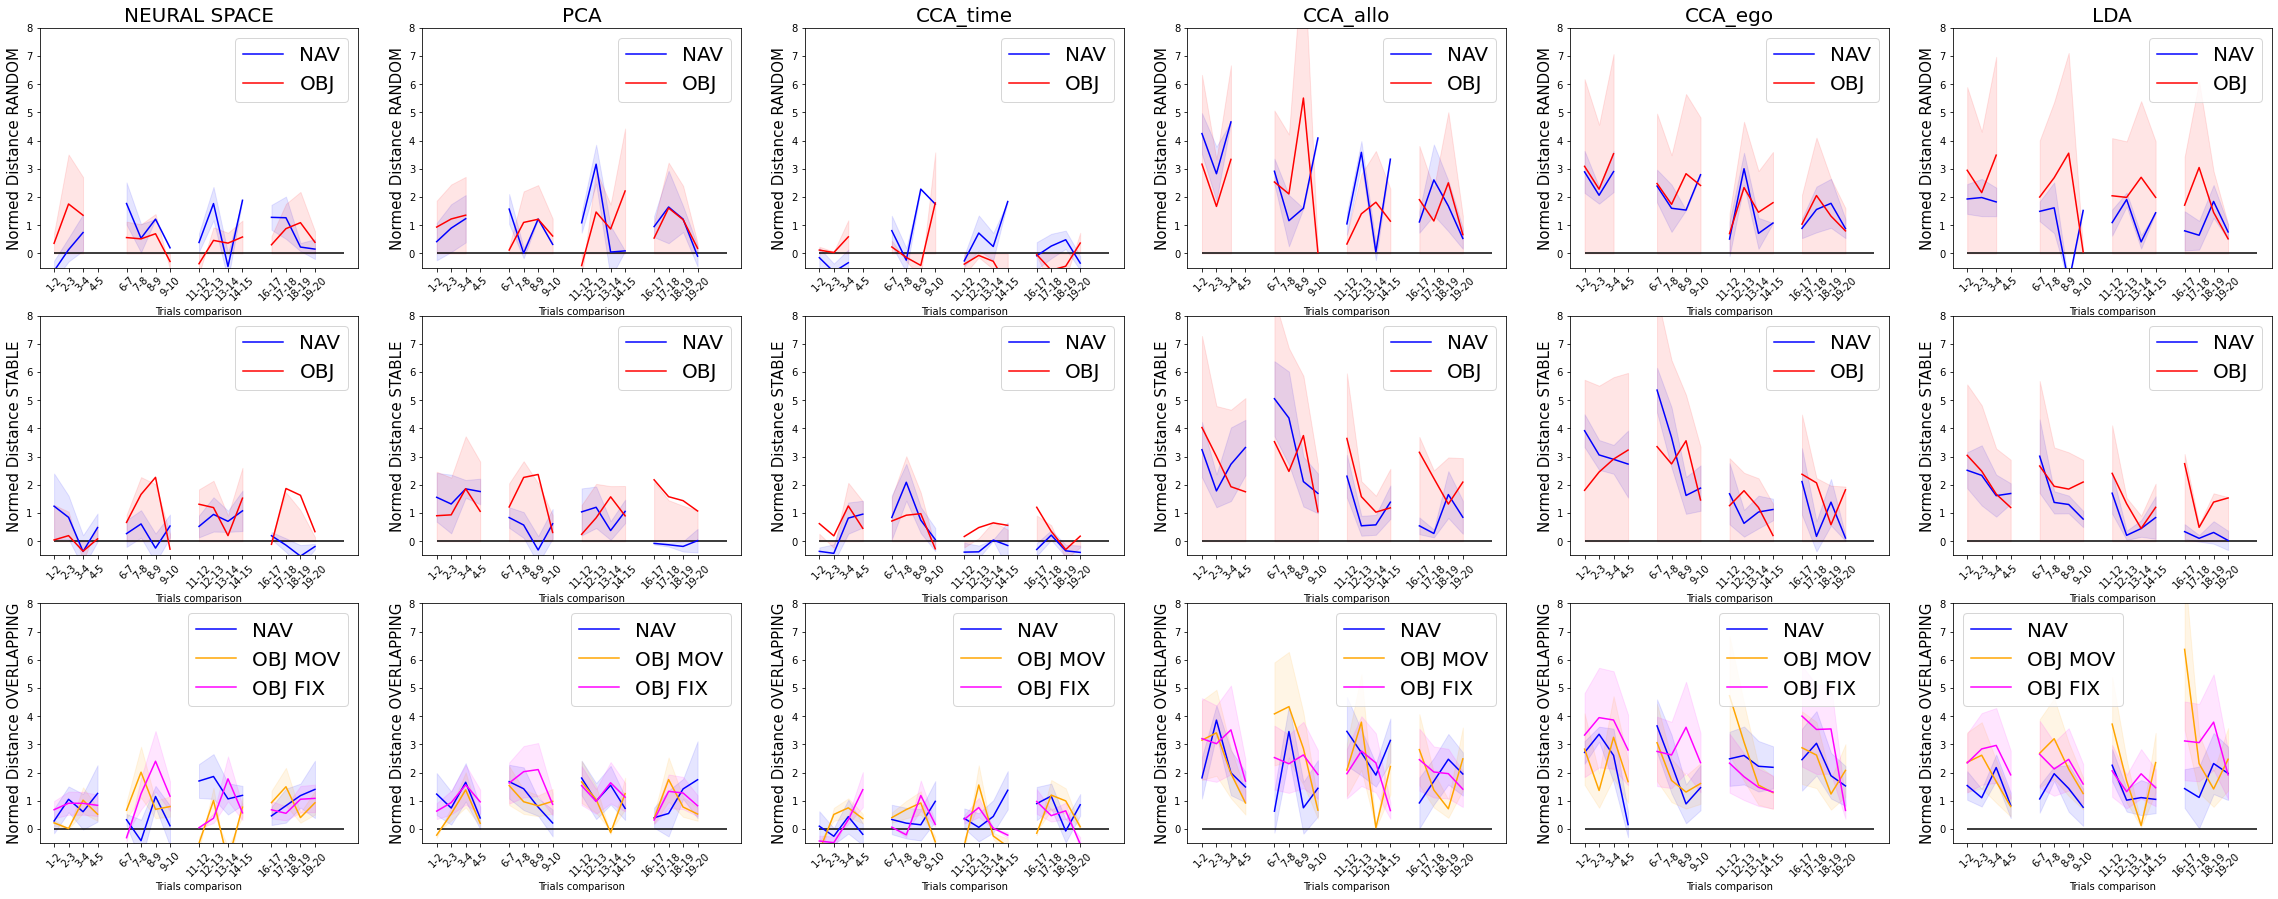

In [17]:

mean_evolution_random_nav = np.nanmean(evolution_random_nav, axis = 0)
mean_evolution_random_nav_std = np.nanstd(evolution_random_nav, axis = 0)/np.sqrt(len(evolution_random_nav))
mean_evolution_random_obj = np.nanmean(evolution_random_obj, axis = 0)
mean_evolution_random_obj_std = np.nanmean(evolution_random_obj, axis = 0)/np.sqrt(len(evolution_random_nav))

mean_evolution_stable_nav = np.nanmean(evolution_stable_nav, axis = 0)
mean_evolution_stable_nav_std = np.nanstd(evolution_stable_nav, axis = 0)/np.sqrt(len(evolution_stable_nav))
mean_evolution_stable_obj = np.nanmean(evolution_stable_obj, axis = 0)
mean_evolution_stable_obj_std = np.mean(evolution_stable_obj, axis = 0)/np.sqrt(len(evolution_stable_nav))

mean_evolution_overlapping_nav = np.nanmean(evolution_overlapping_nav, axis = 0)
mean_evolution_overlapping_nav_std = np.nanstd(evolution_overlapping_nav, axis = 0)/np.sqrt(len(evolution_overlapping_nav))
mean_evolution_overlapping_obj_mov = np.nanmean(evolution_overlapping_obj_mov, axis = 0)
mean_evolution_overlapping_obj_mov_std = np.nanmean(evolution_overlapping_obj_mov, axis = 0)/np.sqrt(len(evolution_overlapping_nav))
mean_evolution_overlapping_obj_fix = np.nanmean(evolution_overlapping_obj_fix, axis = 0)
mean_evolution_overlapping_obj_fix_std = np.nanmean(evolution_overlapping_obj_fix, axis = 0)/np.sqrt(len(evolution_overlapping_nav))

figure, axes = plt.subplots(3,6)
time = np.arange(1,21)

label = ['NEURAL SPACE','PCA','CCA_time','CCA_allo','CCA_ego','LDA']
 
trials_comparison = ['1-2','2-3','3-4','4-5','6-7','7-8','8-9','9-10','11-12','12-13','13-14','14-15','16-17','17-18','18-19','19-20']  
trials_comparison_pos = [0,1,2,3,5,6,7,8,10,11,12,13,15,16,17,18]
for i in range(6):

    for day in range(4):
        time = np.arange(day * 5,day*5+4)
        axes[0,i].plot(time,mean_evolution_random_nav[i][time],'b')
        axes[0,i].fill_between(time,mean_evolution_random_nav[i][time]-mean_evolution_random_nav_std[i][time],mean_evolution_random_nav[i][time]+mean_evolution_random_nav_std[i][time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

        axes[1,i].plot(time,mean_evolution_stable_nav[i][time],'b')
        axes[1,i].fill_between(time,mean_evolution_stable_nav[i][time]-mean_evolution_stable_nav_std[i][time],mean_evolution_stable_nav[i][time]+mean_evolution_stable_nav_std[i][time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

        axes[2,i].plot(time,mean_evolution_overlapping_nav[i][time],'b')
        axes[2,i].fill_between(time,mean_evolution_overlapping_nav[i][time]-mean_evolution_overlapping_nav_std[i][time],mean_evolution_overlapping_nav[i][time]+mean_evolution_overlapping_nav_std[i][time],alpha = 0.1, edgecolor = 'b', facecolor = 'b')

        axes[0,i].plot(time,mean_evolution_random_obj[i][time],'r')
        axes[0,i].fill_between(time,mean_evolution_random_obj[i][time]-mean_evolution_random_obj[i][time],mean_evolution_random_obj[i][time]+mean_evolution_random_obj[i][time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')

        axes[1,i].plot(time,mean_evolution_stable_obj[i][time],'r')
        axes[1,i].fill_between(time,mean_evolution_stable_obj[i][time]-mean_evolution_stable_obj[i][time],mean_evolution_stable_nav[i][time]+mean_evolution_stable_obj[i][time],alpha = 0.1, edgecolor = 'r', facecolor = 'r')
        
        axes[2,i].plot(time,mean_evolution_overlapping_obj_mov[i][time],'orange')
        axes[2,i].fill_between(time,mean_evolution_overlapping_obj_mov[i][time]-mean_evolution_overlapping_obj_mov_std[i][time],mean_evolution_overlapping_obj_mov[i][time]+mean_evolution_overlapping_obj_mov_std[i][time],alpha = 0.1, edgecolor = 'orange', facecolor = 'orange')
        
        axes[2,i].plot(time,mean_evolution_overlapping_obj_fix[i][time],'magenta')
        axes[2,i].fill_between(time,mean_evolution_overlapping_obj_fix[i][time]-mean_evolution_overlapping_obj_fix_std[i][time],mean_evolution_overlapping_obj_fix[i][time]+mean_evolution_overlapping_obj_fix_std[i][time],alpha = 0.1, edgecolor = 'magenta', facecolor = 'magenta')
    
    
    for j in  range(3):
        axes[j,i].set_ylim([-0.5,8])
        axes[j,i].set_xlabel('Trials comparison')
        axes[j,i].set_xticks(trials_comparison_pos)
        axes[j,i].set_xticklabels(trials_comparison)
        for tick in axes[j,i].get_xticklabels():
            tick.set_rotation(45)
        axes[j,i].hlines(0,0,20,color = 'k')

    axes[0,i].set_ylabel('Normed Distance RANDOM', fontsize = 15)
    axes[1,i].set_ylabel('Normed Distance STABLE', fontsize = 15)
    axes[2,i].set_ylabel('Normed Distance OVERLAPPING', fontsize = 15)
   
    axes[0,i].set_title(label[i], fontsize = 20)
    axes[0,i].legend(['NAV','OBJ'], fontsize = 20)
    axes[1,i].legend(['NAV','OBJ'], fontsize = 20)
    axes[2,i].legend(['NAV','OBJ MOV','OBJ FIX'], fontsize = 20)

figure.set_size_inches([40,15])
figure_name = 'representational_distance_evolution_behaviours2.png'
figure.patch.set_facecolor('white')

figure.savefig(figure_path + figure_name) 

array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0.]])

In [18]:
occupied_corners_overlapping_mov_flag

[array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
         1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
         0., 1., 0., 0.]]),
 array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
         1., 0., 1., 0.],
        [0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
      

In [351]:
occupied_corners_overlapping_mov_flag

[array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
         1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
         0., 1., 0., 0.]]),
 array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
         1., 0., 1., 0.],
        [0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
      